In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('placement.csv')

In [6]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


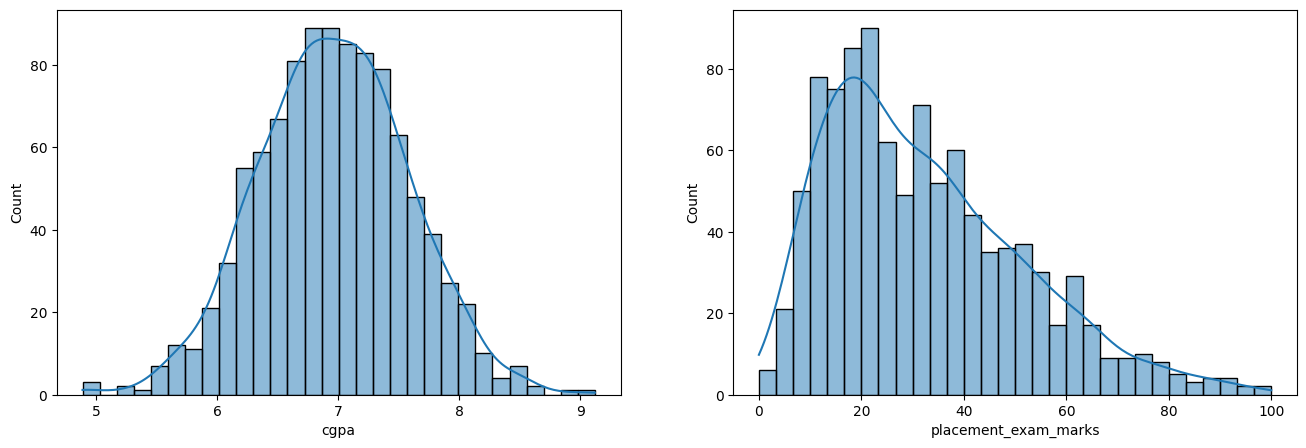

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 5))

# Plot CGPA distribution with histogram and KDE
plt.subplot(1, 2, 1)
sns.histplot(df['cgpa'], kde=True, bins=30)  # kde=True adds density curve

# Plot Placement Exam Marks distribution with histogram and KDE
plt.subplot(1, 2, 2)
sns.histplot(df['placement_exam_marks'], kde=True, bins=30)

plt.show()

In [12]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

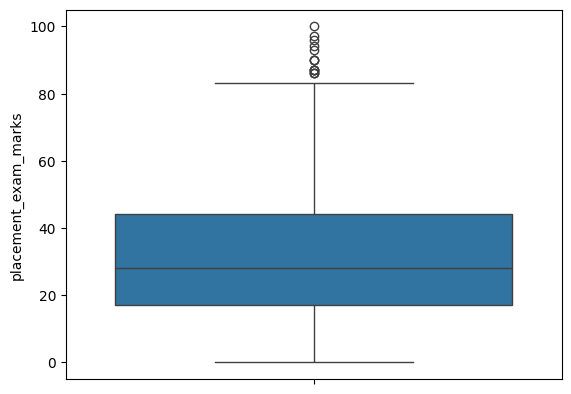

In [14]:
sns.boxplot(df['placement_exam_marks'])

In [16]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [18]:
percentile75

44.0

In [20]:
percentile25

17.0

In [22]:
iqr = percentile75 - percentile25
iqr

27.0

In [24]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [26]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


In [28]:
#finding outliers

df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [30]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


In [32]:
#trimming

new_df = df[df['placement_exam_marks'] < upper_limit]

In [34]:
new_df.shape

(985, 3)

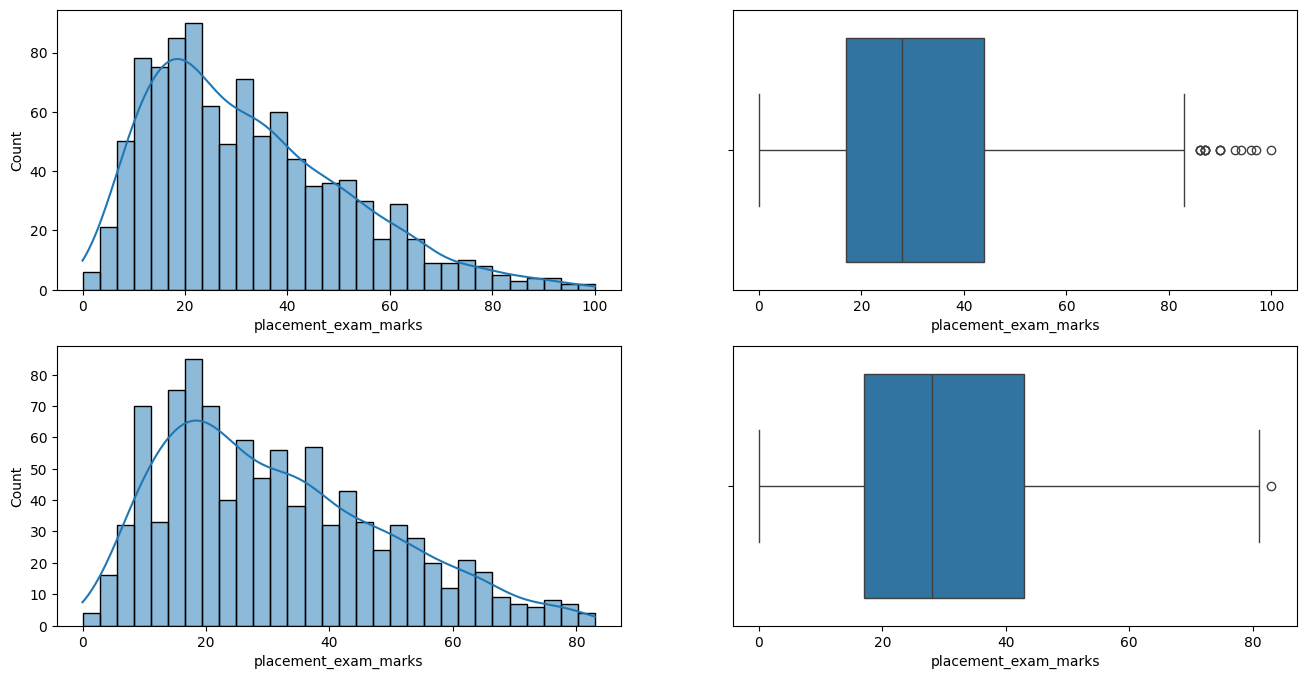

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

# Plot 1: Original dataset - Histogram with KDE
plt.subplot(2, 2, 1)
sns.histplot(df['placement_exam_marks'], kde=True, bins=30)

# Plot 2: Original dataset - Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x=df['placement_exam_marks'])

# Plot 3: Filtered/Modified dataset - Histogram with KDE
plt.subplot(2, 2, 3)
sns.histplot(new_df['placement_exam_marks'], kde=True, bins=30)

# Plot 4: Filtered/Modified dataset - Boxplot
plt.subplot(2, 2, 4)
sns.boxplot(x=new_df['placement_exam_marks']) #remain 1 outlier

plt.show()

In [42]:
#capping
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
) #np.where(condtion,true,false)

In [44]:
new_df_cap.shape

(1000, 3)

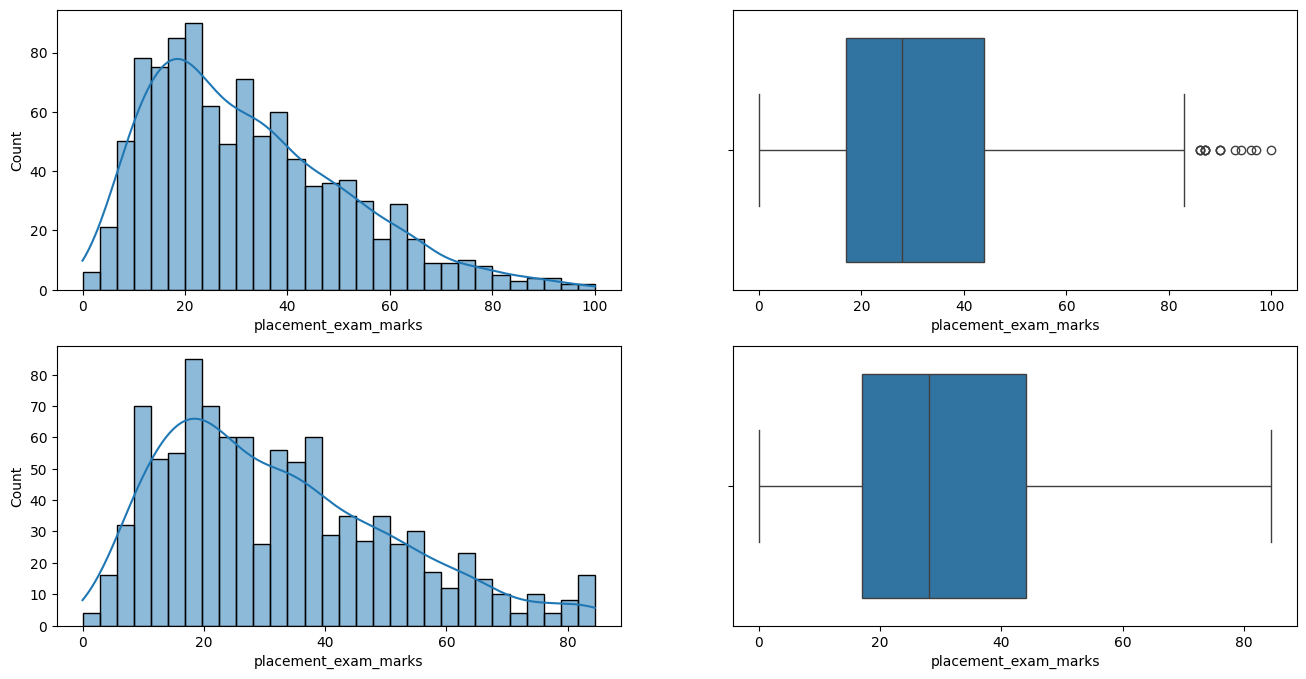

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

# Plot 1: Histogram with KDE for df['placement_exam_marks']
plt.subplot(2, 2, 1)
sns.histplot(df['placement_exam_marks'], kde=True, bins=30)

# Plot 2: Boxplot for df['placement_exam_marks']
plt.subplot(2, 2, 2)
sns.boxplot(x=df['placement_exam_marks'])

# Plot 3: Histogram with KDE for new_df_cap['placement_exam_marks']
plt.subplot(2, 2, 3)
sns.histplot(new_df_cap['placement_exam_marks'], kde=True, bins=30)

# Plot 4: Boxplot for new_df_cap['placement_exam_marks']
plt.subplot(2, 2, 4)
sns.boxplot(x=new_df_cap['placement_exam_marks']) #no outliers

plt.show()